First, import the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../car_accident_dataset/car_accident_data/US_Accidents_Dec20.csv')

let's take a look at what's inside

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


We only want california!

In [4]:
# isolates the instances that is california
df = df[df["State"] == "CA"]

look at percentage of data that's missing

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                             	'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                                 column_name  percent_missing
ID                                        ID         0.000000
Crossing                            Crossing         0.000000
Give_Way                            Give_Way         0.000000
Junction                            Junction         0.000000
No_Exit                              No_Exit         0.000000
Railway                              Railway         0.000000
Roundabout                        Roundabout         0.000000
Station                              Station         0.000000
Country                              Country         0.000000
Stop                                    Stop         0.000000
State                                  State         0.000000
County                                County         0.000000
Traffic_Calming              Traffic_Calming         0.000000
Bump                                    Bump         0.000000
Side                                    Side         0.000000
Traffic_

In [6]:
# Drop columns that have a lot of the data missing
df.drop(['End_Lat', 'End_Lng', 'Number', 'Precipitation(in)', 'Wind_Chill(F)', 'TMC'], axis = 1, inplace=True)

# Drop columns that cannot be convert to numerical value or columns that are considered irrelevant 
df.drop(['ID', 'Source', 'Description', 'Street', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
        'Country', 'Timezone', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1, inplace=True)

In [7]:
# remaining columns
print("Remaining columns: ", list(df))

Remaining columns:  ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']


But wind direction is not numerical!

In [8]:
# mapping wind directions to numerical value

df.loc[(df['Wind_Direction'] == "North"), "Wind_Direction"] = 0
df.loc[(df['Wind_Direction'] == "NNE"), "Wind_Direction"] = 1
df.loc[(df['Wind_Direction'] == "NE"), "Wind_Direction"] = 2
df.loc[(df['Wind_Direction'] == "ENE"), "Wind_Direction"] = 3
df.loc[(df['Wind_Direction'] == "East"), "Wind_Direction"] = 4
df.loc[(df['Wind_Direction'] == "ESE"), "Wind_Direction"] = 5
df.loc[(df['Wind_Direction'] == "SE"), "Wind_Direction"] = 6
df.loc[(df['Wind_Direction'] == "SSE"), "Wind_Direction"] = 7
df.loc[(df['Wind_Direction'] == "South"), "Wind_Direction"] = 8
df.loc[(df['Wind_Direction'] == "SSW"), "Wind_Direction"] = 9
df.loc[(df['Wind_Direction'] == "SW"), "Wind_Direction"] = 10
df.loc[(df['Wind_Direction'] == "WSW"), "Wind_Direction"] = 11
df.loc[(df['Wind_Direction'] == "West"), "Wind_Direction"] = 12
df.loc[(df['Wind_Direction'] == "WNW"), "Wind_Direction"] = 13
df.loc[(df['Wind_Direction'] == "NW"), "Wind_Direction"] = 14
df.loc[(df['Wind_Direction'] == "NNW"), "Wind_Direction"] = 15
df.loc[(df['Wind_Direction'] == "CALM"), "Wind_Direction"] = 16
df.loc[(df['Wind_Direction'] == "Variable"), "Wind_Direction"] = 17
df.loc[(df['Wind_Direction'] == "VAR"), "Wind_Direction"] = 17

Also, we have "True" or "False" value that can be turned to a bool

In [9]:
# replace all boolean values by 0 and 1
df.replace(False, 0,inplace=True)
df.replace(True, 1, inplace=True)

In [10]:
# replace Day by 1 and Night by 0
df['Sunrise_Sunset'].replace('Day', 1, inplace=True)
df['Sunrise_Sunset'].replace('Night', 0, inplace=True)

In [11]:
# convert time 
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [12]:
# add duration in mins
df['duration_in_mins'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60

In [13]:
# add weekday, starts on Monday
df['weekday'] = df['Start_Time'].dt.weekday

In [14]:
# you can add as many cols relating to date as you like
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_of_week.html

In [15]:
# task 2: split up weather

# turning into binary classification
# making 69 more columns lmao

# and then maybe taking in some list from task 3 to drop some columns

In [16]:
# task 3: weather stuff, do some data exploration, prove what to drop
# peter

In [17]:
# Drop the rows where at least one element is missing.
data_len = len(df)
df = df.dropna()
print("dropped data: ", data_len - len(df))

dropped data:  150211


In [18]:
# remaining columns
print("Remaining columns: ", list(df))

Remaining columns:  ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'duration_in_mins', 'weekday']


## data exploration!

In [19]:
import seaborn as sns

<AxesSubplot:>

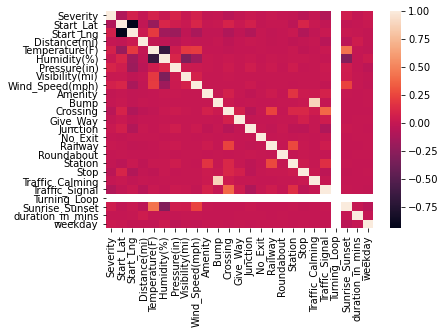

In [20]:
# heat map
sns.heatmap(df.corr(), xticklabels = True, yticklabels = True)

We see that Start_lat and start_long have a really high correlation; we should normalize it!
High correlation between bump and stop; we can get rid of one!

Let's do heat maps for each severity!

<AxesSubplot:>

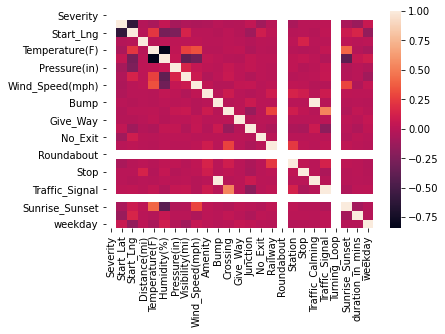

In [21]:
# severity 1 heat map

severity1 = df[df["Severity"]==1]
sns.heatmap(severity1.corr())

<AxesSubplot:>

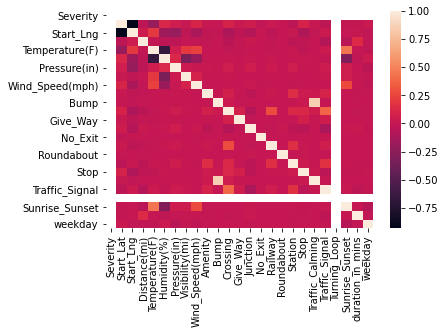

In [22]:
# severity 2 heat map

severity2 = df[df["Severity"]==2]
sns.heatmap(severity2.corr())

<AxesSubplot:>

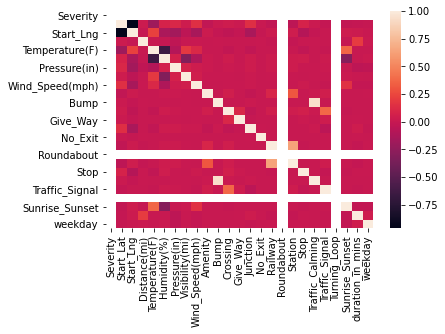

In [23]:
# severity 3 heat map

severity3 = df[df["Severity"]==3]
sns.heatmap(severity3.corr())

<AxesSubplot:>

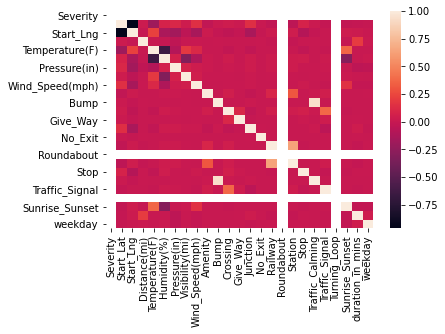

In [24]:
# severity 4 heat map

severity4 = df[df["Severity"]==3]
sns.heatmap(severity4.corr())

array([[<AxesSubplot:title={'center':'Severity'}>]], dtype=object)

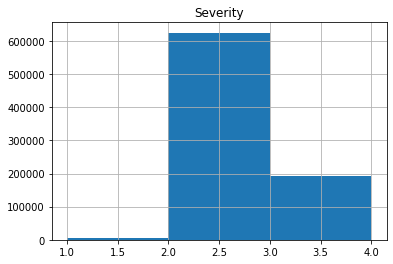

In [25]:
# what is the distribution of severity of accidents in CA?

df.hist("Severity", bins=[1,2,3,4])

We can see that majority of accidents are around 2

In [26]:
# lets see the percentages of the different severities

df["Severity"].value_counts(normalize=True)

# since we have so much severity 2, we want to normalize it by increasing other severity instances

# using sklearn

2    0.759831
3    0.224841
4    0.008520
1    0.006808
Name: Severity, dtype: float64

In [27]:
# we can try to get duration of crash (end - start)

# if we do severity is terms of a continous variable, then we want to linear

## Feature Selection

In [28]:
# we want 10 to 15 features

# principle component analysis and show why we're choosing these features
# reference: like the last 3/4th of the discusion in lect 7 lol

# erik, harjot, jackson

## Model creation

In [29]:
# linear regression model

# list of features here

# use sklearn

# sklearn cross val score? reports back the accuracy :0

# output: duration
# input: using user's location (both automatic OR manual)
#        using an geography API
#        going to depend on what features we want to work with
#        two models?? or use a mean or make default values

# steph and amaan?

In [30]:
# if we want, we can do other models (log) and show their accuracy

In [31]:
# tasks 1: april 28th (cell 8)
# taks 2-3: april 29th (cell 9-10)
# extend feature selection: april 30th (cell 21)
# shorten model creation: may 3rd (cell 22)